# Model to Predict the Relation Between Number of Death and Cancer Type In Children

### 1. I have import all necessary library that i will use it to bulid my model: 

In [133]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler



### 2. Read the Dataframe from "cancer-by-age.csv"

In [134]:
cancerDF =pd.read_csv('cancer-by-age.csv')


### 3. check the dataframe info, describe and head..

In [135]:
cancerDF.describe()

,Count_of_People_Diagnosed_With_Cancer,Data_Collection_Starting_Year,Data_Collection_Ending_Year
count,1.661860e+05,327066.000000,17214.0
mean,2.413947e+03,2007.736842,2016.0
std,1.490531e+04,5.148765,0.0
min,1.600000e+01,1999.000000,2016.0
25%,5.400000e+01,2003.000000,2016.0
50%,1.850000e+02,2008.000000,2016.0
75%,9.220000e+02,2012.000000,2016.0
max,1.245044e+06,2016.000000,2016.0


In [136]:
cancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327066 entries, 0 to 327065
Data columns (total 8 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age_Group                                     327066 non-null  object 
 1   Count_of_People_Diagnosed_With_Cancer         166186 non-null  float64
 2   Cancer_Event_Type                             327066 non-null  object 
 3   Cancer_Frequency_Based_on_Race_And_Ethnicity  327066 non-null  object 
 4   Gender                                        327066 non-null  object 
 5   Cancer_Organ_Site                             327066 non-null  object 
 6   Data_Collection_Starting_Year                 327066 non-null  int64  
 7   Data_Collection_Ending_Year                   17214 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 20.0+ MB


In [137]:
cancerDF.head(20)

,Age_Group,Count_of_People_Diagnosed_With_Cancer,Cancer_Event_Type,Cancer_Frequency_Based_on_Race_And_Ethnicity,Gender,Cancer_Organ_Site,Data_Collection_Starting_Year,Data_Collection_Ending_Year
0,01-Apr,191.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
1,Oct-14,227.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
2,15-19,297.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
3,20-24,404.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
4,25-29,674.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
5,30-34,1372.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
6,35-39,3297.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
7,40-44,5964.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
8,45-49,9261.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN
9,05-Sep,230.0,Mortality,All Races,Female,All Cancer Sites Combined,1999,NaN


### 4. As you see in head of the dataframe, there are uncorrect data in "Age_Group" column, some Age groups written as date, becasue of that I have used unique() function to determine all the uncorrect data, then "replace" function to rewrite all the age groups from date to Age:

In [138]:
cancerDF.Age_Group.unique()

array(['01-Apr', 'Oct-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '05-Sep', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85+', '<1'], dtype=object)

In [139]:
cancerDF['Age_Group'] = cancerDF['Age_Group'].replace(
    ['01-Apr','05-Sep','Oct-14'],['1-4', '5-9' , '10-14'])

### 5. Count of People Diagnosed With Cancer shouldn't be null neither float because of that, because of that, I have used fillna(0) function to replace null value to 0 in 'Count_of_People_Diagnosed_With_Cancer' column and change the value to be integer: 

In [140]:
cancerDF['Count_of_People_Diagnosed_With_Cancer'] = cancerDF['Count_of_People_Diagnosed_With_Cancer'].fillna(0).astype(int)


In [141]:
cancerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327066 entries, 0 to 327065
Data columns (total 8 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age_Group                                     327066 non-null  object 
 1   Count_of_People_Diagnosed_With_Cancer         327066 non-null  int64  
 2   Cancer_Event_Type                             327066 non-null  object 
 3   Cancer_Frequency_Based_on_Race_And_Ethnicity  327066 non-null  object 
 4   Gender                                        327066 non-null  object 
 5   Cancer_Organ_Site                             327066 non-null  object 
 6   Data_Collection_Starting_Year                 327066 non-null  int64  
 7   Data_Collection_Ending_Year                   17214 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 20.0+ MB


### 6. In the model, I focus on the group of age between 0 - 19 years old, and the dataframe contain age more than what I need.
### so, I keep only the rows with target age:

In [142]:
cancerDF = cancerDF.loc[(cancerDF['Age_Group']  == '<1') 
                             | (cancerDF['Age_Group']  =='1-4')
                             | (cancerDF['Age_Group']  =='5-9')
                             | (cancerDF['Age_Group']  =='10-14')
                             | (cancerDF['Age_Group']  =='15-19')] 

### 7.For simplicity, I have changed column names using "rename" function:

In [147]:
cancerDF= cancerDF.rename(columns = {'Age_Group':'Age','Count_of_People_Diagnosed_With_Cancer':'Count',
                                 'Cancer_Event_Type': 'Event','Cancer_Organ_Site':'Organ',
                                'Data_Collection_Starting_Year':'S_Year',
                                  'Cancer_Frequency_Based_on_Race_And_Ethnicity':'Race'  }) 

In [148]:
cancerDF.head(20)

,Age,Count,Event,Race,Gender,Organ,S_Year,Data_Collection_Ending_Year
684,1-4,57,Mortality,All Races,Female,Brain and Other Nervous System,1999,NaN
685,10-14,66,Mortality,All Races,Female,Brain and Other Nervous System,1999,NaN
686,15-19,46,Mortality,All Races,Female,Brain and Other Nervous System,1999,NaN
693,5-9,88,Mortality,All Races,Female,Brain and Other Nervous System,1999,NaN
750,5-9,19,Mortality,Black,Female,Brain and Other Nervous System,1999,NaN
760,1-4,16,Mortality,Hispanic,Female,Brain and Other Nervous System,1999,NaN
769,5-9,17,Mortality,Hispanic,Female,Brain and Other Nervous System,1999,NaN
779,1-4,47,Mortality,White,Female,Brain and Other Nervous System,1999,NaN
780,10-14,53,Mortality,White,Female,Brain and Other Nervous System,1999,NaN
781,15-19,36,Mortality,White,Female,Brain and Other Nervous System,1999,NaN


### 8. I whant to avoid 'All Cancer Sites Combined', from Organ colmun,  and 0 raw from Count column

In [153]:
cancerDF = cancerDF.drop(cancerDF.index[cancerDF['Organ'] == 'All Cancer Sites Combined'])
cancerDF = cancerDF.drop(cancerDF.index[cancerDF['Count'] == 0])

cancerDF.drop('Data_Collection_Ending_Year',axis='columns', inplace=True)


In [154]:
cancerDF.head(15)

,Age,Count,Event,Race,Gender,Organ,S_Year
684,1-4,57,Mortality,All Races,Female,Brain and Other Nervous System,1999
685,10-14,66,Mortality,All Races,Female,Brain and Other Nervous System,1999
686,15-19,46,Mortality,All Races,Female,Brain and Other Nervous System,1999
693,5-9,88,Mortality,All Races,Female,Brain and Other Nervous System,1999
750,5-9,19,Mortality,Black,Female,Brain and Other Nervous System,1999
760,1-4,16,Mortality,Hispanic,Female,Brain and Other Nervous System,1999
769,5-9,17,Mortality,Hispanic,Female,Brain and Other Nervous System,1999
779,1-4,47,Mortality,White,Female,Brain and Other Nervous System,1999
780,10-14,53,Mortality,White,Female,Brain and Other Nervous System,1999
781,15-19,36,Mortality,White,Female,Brain and Other Nervous System,1999


### 9. check all type of cancer from datafram

In [155]:
cancerDF.Organ.unique()

array(['Brain and Other Nervous System', 'Cervix', 'Colon and Rectum',
       'Female Breast', 'Hodgkin Lymphoma', 'Kidney and Renal Pelvis',
       'Leukemias', 'Liver and Intrahepatic Bile Duct',
       'Lung and Bronchus', 'Male and Female Breast',
       'Melanomas of the Skin', 'Non-Hodgkin Lymphoma',
       'Oral Cavity and Pharynx', 'Ovary', 'Testis', 'Thyroid',
       'Urinary Bladder', 'Stomach', 'Pancreas', 'Corpus and Uterus, NOS'],
      dtype=object)

### check which type of cancer is the most common??

In [156]:
cancerDF.Organ.value_counts()

Leukemias                           2085
Brain and Other Nervous System      1871
Non-Hodgkin Lymphoma                 956
Kidney and Renal Pelvis              730
Hodgkin Lymphoma                     641
Liver and Intrahepatic Bile Duct     452
Thyroid                              436
Ovary                                332
Melanomas of the Skin                324
Oral Cavity and Pharynx              306
Testis                               302
Colon and Rectum                     190
Lung and Bronchus                     83
Urinary Bladder                       47
Cervix                                40
Pancreas                              33
Female Breast                         28
Male and Female Breast                14
Stomach                               11
Corpus and Uterus, NOS                 4
Name: Organ, dtype: int64

### Now, I have used seborn to check the relations between the fetuers in the dataframe:

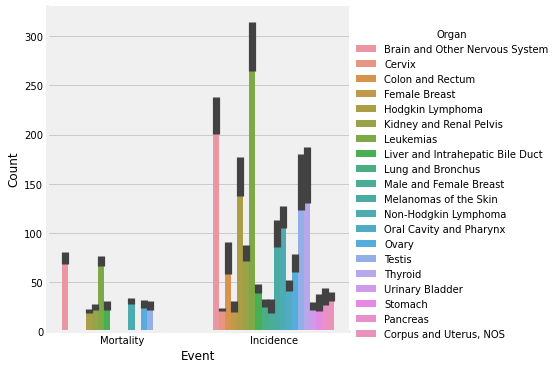

In [210]:
sns.catplot(data=cancerDF, kind="bar", x="Event", y="Count", hue="Organ" )

### we can see that number of death from Leukemias is the most

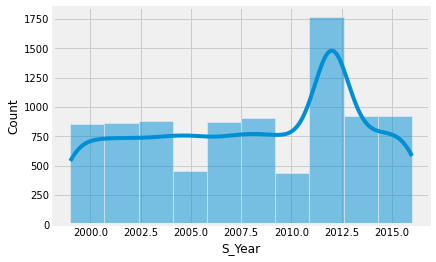

In [158]:
sns.histplot(cancerDF['S_Year'],bins=10, kde=True);

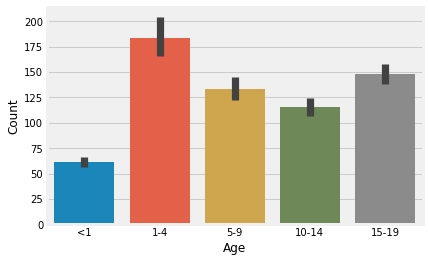

In [160]:
sns.barplot(data=cancerDF, x='Age', y= 'Count', order =['<1','1-4','5-9','10-14','15-19']);

### Most incedence at age 1- 4

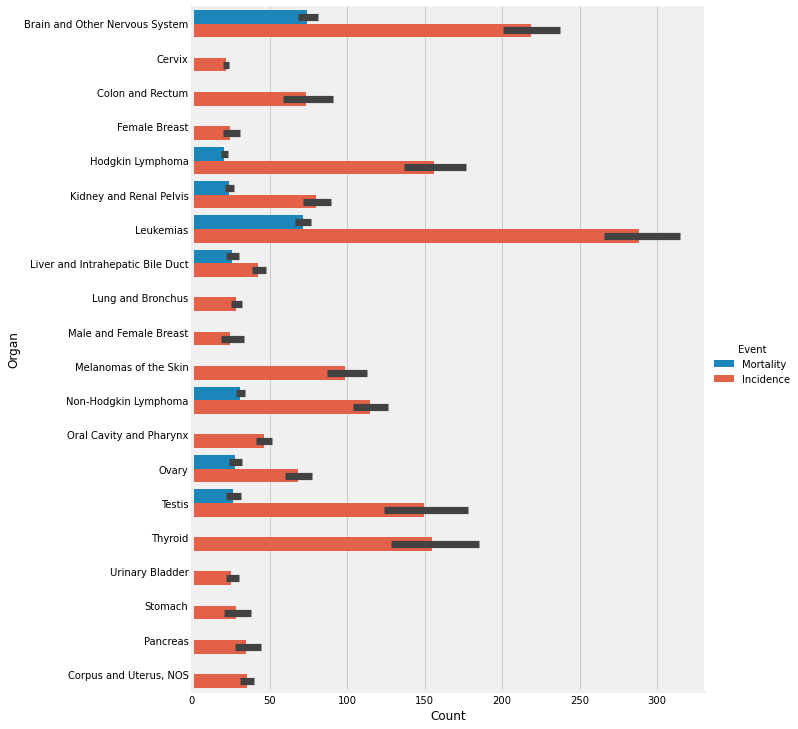

In [208]:
sns.catplot(data=cancerDF, x="Count", y="Organ", hue="Event",kind="bar",  height =10)
